# Bio 204: Multiple Regression


In [18]:
# if we use %matplotlib notebook we get embedded plots
# we can interact with!
%matplotlib notebook

In [19]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn


## Review of bivariate regression

Recall the model for bivariate least-squares regression.

When we regress $Y$ and $X$ we're looking for a linear function, $f(X)$, for which the following sum-of-squared deviations is minimized:

$$
\sum_{i=1}^n (y_i - f(x_i))^2
$$

The general form a linear function of one variable is a line, 

$$
f(x) = a + bX
$$

where $b$ is the slope of the line and $a$ is the intercept.

In pictures, what we're looking for is the line that minimizes the length of the gray lines in the figure below.

<IPython.core.display.Javascript object>


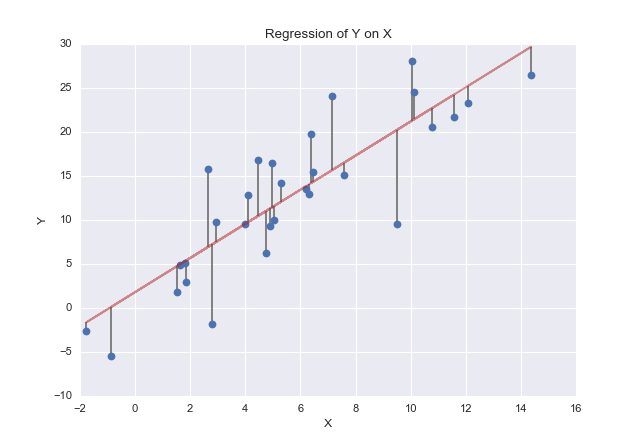

In [20]:
# generate example data
np.random.seed(20140420)
npts = 30
x = np.linspace(0,10,npts) + np.random.normal(0,2,size=npts)
a = 1
b = 2
y = b*x + a + np.random.normal(0,4,size=npts)

# fit regression
regr = stats.linregress(x,y)
regr_line = regr.slope*x + regr.intercept

# draw scatter
plt.plot(x,y, 'o')

# draw regression line
plt.plot(x, regr_line, marker=None, color='firebrick', alpha=0.5)

# draw residuals
plt.vlines(x, y, regr_line, color='gray')

plt.title("Regression of Y on X")
plt.xlabel("X")
plt.ylabel("Y")
pass

## OLS regression with the StatsModels library

Let's introduce the [StatsModels](http://statsmodels.sourceforge.net/stable/index.html) library.  StatsModels implements a wide range of statistical methods that complement the functions defined in the `scipy.stats` module. First we'll revisit simple bivariate regression using StatsModels as then we'll turn to multiple regression.

In [4]:
# import the formula based module for statsmodels
import statsmodels.formula.api as smf

We first put the x and y data into a DataFrame, in order to facilitate the use of R-style formulas for specifying statistical models (R is another programming environment that is popular for statistical analysis).

In [5]:
# put the x and y data with column names x and y
data = pd.DataFrame(dict(x=x, y=y))

Now we specify the model and fit the model using the `ols()` (ordinary least squares) function defined in `statsmodels`.. We can read the formula in the call to `ols` as specifying that we want to model $y$ as a function of $x$.

In [6]:
# read this "formula" as specifying y as a function of x
fitmodel = smf.ols('y ~ x', data).fit()

The `ols` function returns an object of type `RegressionResultsWrapper`.  This is a Python object that bundles together lots of useful information about the model we just fit.

In [7]:
type(fitmodel)

statsmodels.regression.linear_model.RegressionResultsWrapper

For example, we can print summary tables using the `summary()` method:

In [8]:
print(fitmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     73.04
Date:                Wed, 20 Apr 2016   Prob (F-statistic):           2.74e-09
Time:                        12:53:13   Log-Likelihood:                -88.144
No. Observations:                  30   AIC:                             180.3
Df Residuals:                      28   BIC:                             183.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.8051      1.540      1.172      0.2

We can get individual properties such as the paramaeters of the model (i.e. slope and intercept), coefficient of determination, the degrees of freedom for the model, etc.

In [9]:
fitmodel.params

Intercept    1.805100
x            1.939566
dtype: float64

In [10]:
fitmodel.rsquared

0.72287556051209689

In [11]:
fitmodel.df_model, fitmodel.df_resid

(1.0, 28.0)

For a full list of attributes and functions associated with the `RegressionResults` object see the StatsModel documentation [here](http://statsmodels.sourceforge.net/stable/generated/statsmodels.regression.linear_model.RegressionResults.html).

## Multiple regression is conceptually similar to bivariate regression

The idea behind multiple regression is almost exactly the same as bivariate regression, except now we try and fit a linear model for $Y$ using multiple explanatory variables, $X_1, X_2,\ldots, X_m$. That is we're looking for a linear function, $f(X_1, X_2,\ldots,X_m)$ that minimizes:

$$
\sum_{i=1}^n(y_i - f(x_1, x_2,\ldots, x_m))^2
$$

A linear function of more than one variable is written as:

$$
f(X_1, X_2,\ldots,X_m) = a + b_1X_1 + b_2X_2 + \cdots + b_mX_m
$$

The values, $b_1, b_2,\ldots,b_m$ are the **regression coefficients**.  Geometrically they have the same interpretation as in the bivariate case -- slopes with respect to the corresponding variable.

### Solving the multiple regression problem

Mathematically, we simultaneously find the best fitting regression coefficients, $b_1, b_2,\ldots,b_m$, using linear algebra.  However, since we haven't covered linear algebra in this course, I will omit the details.

### Lines, planes, and hyperplanes
A linear function of one variable is a line, a linear function of two variables is a plane, and a linear function of more than two variables is generally called a *hyperplane*.  


## Example: Modeling $Y$ as a function of $X_1$ and $X_2$

Let's fit a multiple regression to a synthetic data set that involves two explanatory variables, $X_1$ and $X_2$. We'll also take this as an opportunity to introduce 3D plots in matplotlib.

In [12]:
# generate a synthetic data set
npts = 30
x1 = np.linspace(1,5,npts) + np.random.normal(0, 2, size=npts)
x2 = np.linspace(5,10,npts) + np.random.normal(0, 2, size=npts)

# "true "model parameters
a = 1
b1, b2 = 2, -1

y = a + b1*x1 + b2*x2 + np.random.normal(0,3, size=npts)

data2 = pd.DataFrame(dict(x1=x1, x2=x2, y=y))

### 3D Scatter Plot
Maplotlib 3D plotting functions lives in a module called `mpl_toolkits.mplot3d`.  Here's how to create a 3D scatter plot.

<IPython.core.display.Javascript object>


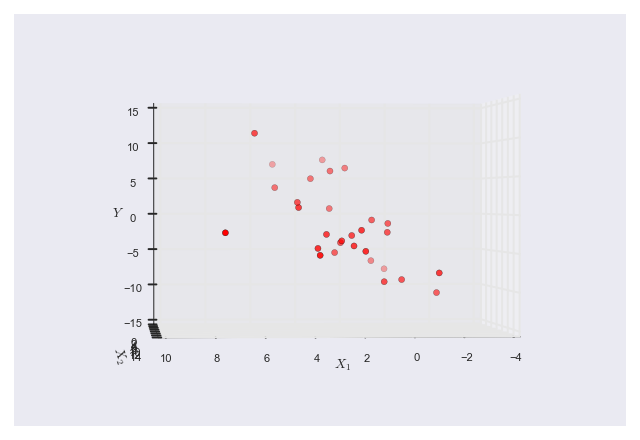

In [21]:
# drawing a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(data2.x1, data2.x2, data2.y, c='red', s=30)

# this sets the viewpoint in the 3D space from which we are viewing
# the plot
ax.view_init(elev=10., azim=30)

ax.set_xlabel("$X_1$", fontsize=12)
ax.set_ylabel("$X_2$", fontsize=12)
ax.set_zlabel("$Y$", fontsize=12)
fig.tight_layout()

pass

## Fitting a multiple regression using StatsModels

The formula based method for specifying models extends to the multiple regression case, as illustrated below.

In [14]:
# read the model as y is a function of x1 and x2
model2 = smf.ols('y ~ x1 + x2', data2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     23.01
Date:                Wed, 20 Apr 2016   Prob (F-statistic):           1.47e-06
Time:                        12:53:13   Log-Likelihood:                -78.179
No. Observations:                  30   AIC:                             162.4
Df Residuals:                      27   BIC:                             166.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.6292      2.048      0.795      0.4

As was the case for univariate regression, we're interested in key information such as the the regression coefficients, the R-squared value associated with the model, confidence intervals and P-values for the coefficents, etc.

### Drawing the regression plane in 3D

To get a 3D representation of the regression plane, requires a fair amount of setup.  If you were generating such plots frequntly you'd want to wrap it in a function.

<IPython.core.display.Javascript object>


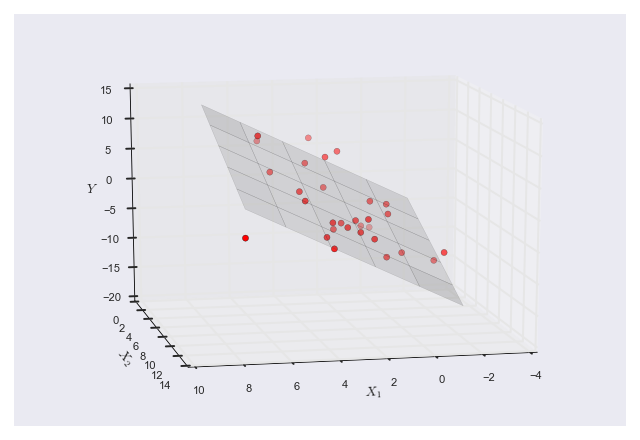

In [22]:
# get coefficients of fit
b1 = model2.params.x1
b2 = model2.params.x2
a  = model2.params.Intercept

# find appropriate limits of data
x1min, x1max = data2.x1.min(), data2.x1.max()
x2min, x2max = data2.x2.min(), data2.x2.max()

# setup evenly spaced points to specify the regression surface drawing
X1, X2 = np.meshgrid(np.linspace(x1min, x1max, 50),
                           np.linspace(x2min, x2max, 50))

# Calculates predicted values
Yhat = a + b1*X1 + b2*X2

# create plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=60)  # specify view point

# add surface
ax.plot_surface(X1, X2, Yhat,
                color='gray',
                alpha = 0.2)

# add scatter
ax.scatter3D(data2.x1, data2.x2, data2.y, c='red', s=30)

# setup axis labels
ax.set_xlabel("$X_1$", fontsize=12)
ax.set_ylabel("$X_2$", fontsize=12)
ax.set_zlabel("$Y$", fontsize=12)
fig.tight_layout()


<IPython.core.display.Javascript object>


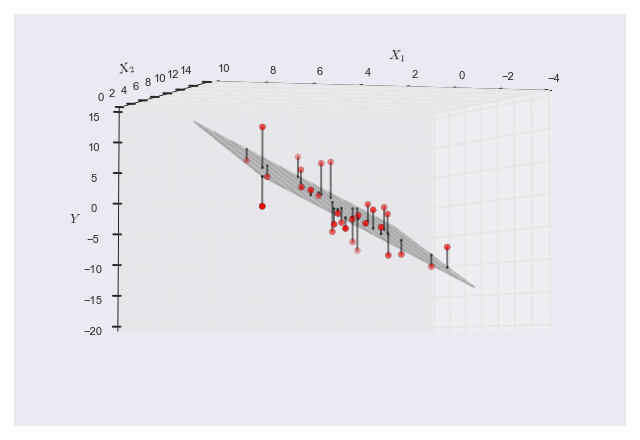

In [23]:
# same plot as before, but including the residuals and using a wireframe surface plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(data2.x1, data2.x2, data2.y, c='red', s=30)
ax.scatter3D(data2.x1, data2.x2, model2.fittedvalues, c='black', s=5)

for i in range(len(data2.x1)):
    ax.plot((data2.x1[i],data2.x1[i]), 
            (data2.x2[i],data2.x2[i]), 
            (data2.y[i], model2.fittedvalues[i]), 
            color='black', alpha=0.5,zorder=1)

ax.plot_wireframe(X1, X2, Yhat,
                rstride=4,
                cstride=4,
                color='gray',
                alpha = 0.3, zorder=10)
    
ax.view_init(elev=20, azim=80)

ax.set_xlabel("$X_1$", fontsize=12)
ax.set_ylabel("$X_2$", fontsize=12)
ax.set_zlabel("$Y$", fontsize=12)
fig.tight_layout()

pass

## Interpretting Multiple Regression

Here are some things to keep in mind when interpretting a multple regression:

* Comparing the size of regression coefficients only makes sense if all the predictor (explanatory) variables have the same scale

* If the explanatory variables ($X_1, X_2,\ldots,X_m$) are highly correlated, then the regression solution is "unstable" -- a small change in the data could lead to a very large change in the regression model.